In [1323]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


In [1324]:
dataset=pd.read_csv("Salary_Data.csv")


In [1325]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [1326]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [1327]:
x=dataset.iloc[:,[0]].values
y=dataset.iloc[:,[1]].values


In [1328]:
# normalising the dataset
a=x.mean()

In [1329]:
b=x.std()

In [1330]:
x=(x-a)/b

# visualising data

In [1331]:
import seaborn as sns
sns.set()

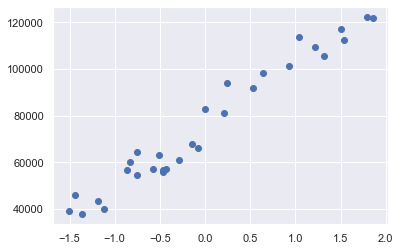

In [1332]:
plt.scatter(x,y)
plt.show()

# algorithm for best fit line

In [1333]:
# a function hypothesis to define the model
def hypothesis(theta,x):
    y_pred=theta[1]*x+theta[0]
    return y_pred

In [1334]:
def gradient_calculator(x,y,theta,m=x.shape[0]):
    grad=np.zeros((2,))
    for i in range(m):
        # predicting one value of y
        y_pred=hypothesis(theta,x[i])
        grad[0]+=y_pred-y[i]
        grad[1]+=x[i]*(y_pred-y[i])
    
    return grad/m

In [1335]:

def gradient_descent(x,y,max_steps=50,lr=0.1):
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]
    # note that we will use this theta list for further use
    for i in range(max_steps):
        # calculate grad
        grad=gradient_calculator(x,y,theta)
        err=error(theta,x,y)
        error_list.append(err)
        #  update theta
        theta[0]=theta[0]-lr*grad[0]
        theta[1]=theta[1]-lr*grad[1]
        theta_list.append((theta[0],theta[1]))
    return theta,error_list,theta_list
def error(theta,x,y,m=y.shape[0]):
    e=0
    for i in range(m):
        y_pred=hypothesis(theta,x[i])
        e+=(y_pred-y)**2
    e=e/m
    # mean squared error is returned
    return e

In [1336]:
theta,error_list,theta_list=gradient_descent(x,y)

In [1337]:
theta

array([75611.29762292, 26231.29191238])

In [1338]:
error_list=np.reshape(error_list,(-1,1))

In [1339]:
a=np.arange(1500)
a.shape

(1500,)

In [1340]:
error_list.shape

(1500, 1)

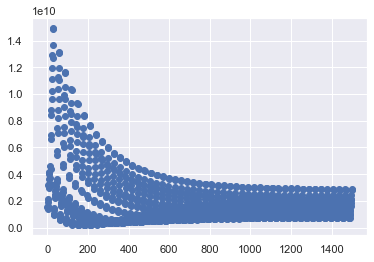

In [1341]:

plt.scatter(a,error_list)
plt.show()

# prediction and best line

In [1342]:
y_pred=hypothesis(theta,x)

In [1343]:
y_pred.shape

(30, 1)

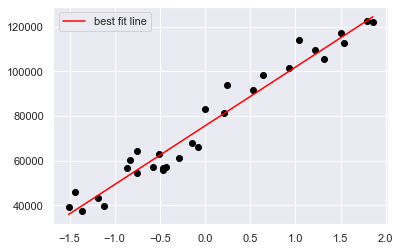

In [1344]:
# original dataset points
plt.scatter(x,y,color='black')
# best fit line using the y_pred values
plt.plot(x,y_pred,color='red',label="best fit line")
plt.legend()
plt.show()


In [1345]:
# to get the slope we have theta1 and for intercept we have theta0
theta[0]

75611.29762291806

In [1346]:
theta[1]

26231.29191237802

# getting the accuracy via R2 score


In [1347]:
def r2_score(y_pred,y,m=y.shape[0]):
    r2=np.zeros((2,))  # r2[0]=numr and r2[1] is denr
    a=y.mean()
    # method-1
    
    # for i in range(m):
    #     r2[0]+=(y[i]-y_pred[i])**2
    #     r2[1]+=(y[i]-a)**2

    # method-2
    r2[0]=np.sum((y_pred-y)**2)
    r2[1]=np.sum((y-a)**2)
    score=1-(r2[0]/r2[1])
    return score    


In [1348]:
r2_score(y_pred=y_pred,y=y)



0.9567200541457755

In [1349]:
accuracy=(r2_score(y_pred=y_pred,y=y))*100
print(str(accuracy)+"%")

95.67200541457755%


# visualising loss function,Gradient Descent,Theta

In [1350]:
theta

array([75611.29762292, 26231.29191238])

### the sole purpose of the x0 and y1 is to plot the coordinate system for theta

In [1351]:
# loss function
# we will take the surface around the theta coordinate
# we can generate that using meshgrid function
# x0=coordinate around the theta0 i.e the intercept
x0 =np.arange(75576,75646,1)
# y1 will be the coordinate around the theta1 i.e the slope for our best fit line
y1=np.arange(26106,26276,1)
x0,y1=np.meshgrid(x0,y1)

In [1352]:
x0.shape

(170, 70)

In [1353]:
y1.shape

(170, 70)

In [1354]:
y1

array([[26106, 26106, 26106, ..., 26106, 26106, 26106],
       [26107, 26107, 26107, ..., 26107, 26107, 26107],
       [26108, 26108, 26108, ..., 26108, 26108, 26108],
       ...,
       [26273, 26273, 26273, ..., 26273, 26273, 26273],
       [26274, 26274, 26274, ..., 26274, 26274, 26274],
       [26275, 26275, 26275, ..., 26275, 26275, 26275]])

In [1355]:
# loss function(j)will be the matrix that store the all possible value of theta and we will use gradient descent  to find the minimum theta there

In [1356]:
t=[]
# t will be our losss function value
a=x0.shape[0]
b=x0.shape[1]
for i in range(a):
    k=[] 
    for j in range(b):
        y_pred=y1[i,j]*x + x0[i,j]
        c=np.sum((y_pred-y)**2)/y.shape[0]
        k.append(c)
    t.append(k)
# print(j[3][3])

In [1357]:
t=np.array(t)
t[1][1]

31520122.626208678

### lets visualise the error


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19356\4040565345.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=graph.gca(projection='3d')


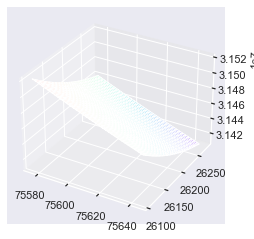

In [1358]:
graph=plt.figure()
axes=graph.gca(projection='3d')
axes.plot_surface(x0,y1,t,cmap='rainbow')
plt.show()

### contour plot 3d for this figure 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19356\2556302531.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=graph.gca(projection='3d')


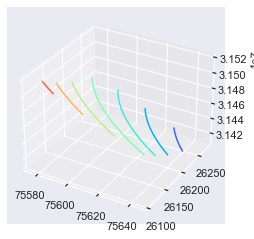

In [1359]:
graph=plt.figure()
axes=graph.gca(projection='3d')
axes.contour(x0,y1,t,cmap='rainbow')
plt.show()

### 2-d contour plot

### visualising the theta update


In [1360]:
theta_list=np.array(theta_list)

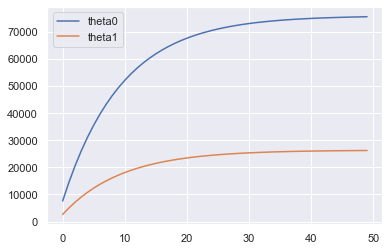

In [1361]:
plt.plot(theta_list,label=('theta0','theta1'))
plt.legend()
plt.show()

### how theta moves in the our error function graph

In [1362]:
error_list.shape

(1500, 1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19356\2000382860.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=graph.gca(projection='3d')


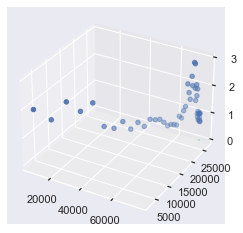

In [1365]:
graph=plt.figure()
axes=graph.gca(projection='3d')
axes.plot_surface(x0,y1,t,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list[1320:1370])
plt.show()

In [ ]:
graph=plt.figure()
axes=graph.gca(projection='3d')
axes.contour(x0,y1,t,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list[1320:1370])
plt.show()

In [1369]:
theta_list.shape

(50, 2)

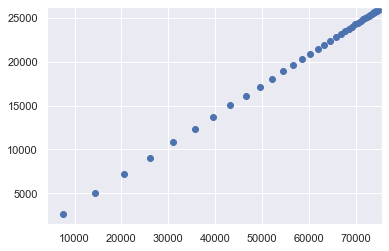

In [1367]:
plt.contour(x0,y1,t,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()

# visualising how the best fit line changes over time

In [1371]:
theta_list

array([[ 7600.3       ,  2636.71824435],
       [14440.57      ,  5009.76466427],
       [20596.813     ,  7145.5064422 ],
       [26137.4317    ,  9067.67404233],
       [31123.98853   , 10797.62488246],
       [35611.889677  , 12354.58063856],
       [39651.0007093 , 13755.84081906],
       [43286.20063837, 15016.97498151],
       [46557.88057453, 16151.99572771],
       [49502.39251708, 17173.5143993 ],
       [52152.45326537, 18092.88120372],
       [54537.50793883, 18920.3113277 ],
       [56684.05714495, 19664.99843929],
       [58615.95143046, 20335.21683971],
       [60354.65628741, 20938.4134001 ],
       [61919.49065867, 21481.29030444],
       [63327.8415928 , 21969.87951835],
       [64595.35743352, 22409.60981087],
       [65736.12169017, 22805.36707414],
       [66762.80952115, 23161.54861108],
       [67686.82856904, 23482.11199432],
       [68518.44571213, 23770.61903925],
       [69266.90114092, 24030.27537968],
       [69940.51102683, 24263.96608606],
       [70546.75

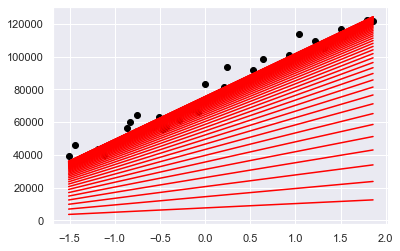

<Figure size 432x288 with 0 Axes>

In [1380]:
plt.ion()
t1=theta_list[:,1]
t0=theta_list[:,0]
for i in range(1):
    y_predd=t1*x+t0
    plt.scatter(x,y,c='black')
    plt.plot(x,y_predd,'red')
    plt.draw()
    plt.pause(1)
    plt.clf()